<a href="https://colab.research.google.com/github/aamirattara/Quantitative-Finance/blob/main/Modern_Portfolio_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modern Portfolio Theory**

[*********************100%***********************]  20 of 20 completed


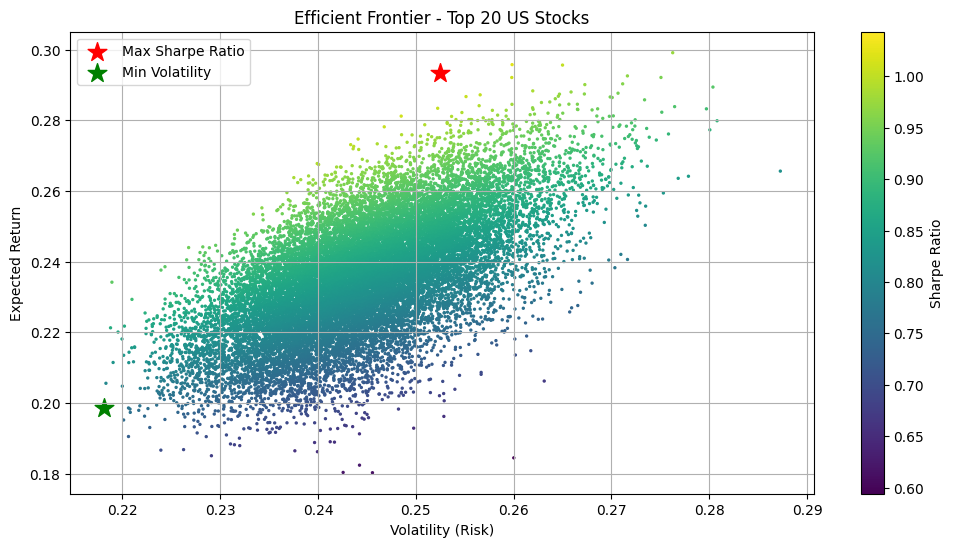

🔍 Optimal Portfolio Weights (Max Sharpe):
 NEE      0.122816
MS       0.121309
AXP      0.095165
SCHW     0.094152
TJX      0.087337
META     0.069406
AAPL     0.062092
GOOGL    0.053789
BA       0.047603
TMO      0.043327
CAT      0.037599
BRK-B    0.037459
MSFT     0.037084
BSX      0.029088
PGR      0.019032
SPGI     0.016802
QCOM     0.012018
NVDA     0.009904
AMZN     0.003143
TSLA     0.000876
dtype: float64


In [ ]:
#Import Required Libraries
import yfinance as yf       # To download financial data from Yahoo Finance
import numpy as np          # For numerical and matrix operations
import pandas as pd         # For handling and analyzing data in table format
import matplotlib.pyplot as plt  # To create plots
import seaborn as sns       # For beautiful plots (used later if needed)
from scipy.optimize import minimize  # For advanced optimization (not used here, but useful for later)

#Define the Stock List (Top 20 US Companies)
#This is your investment universe – the 20 largest companies by market cap. You will build an optimal portfolio using these.
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA', 'BRK-B',"QCOM","PGR","CAT","SPGI","AXP","MS","BSX",
    "BA","TMO","SCHW","TJX","NEE",]



#Download Stock Data from Yahoo Finance
data = yf.download(tickers, start="2018-01-01", end="2023-12-31", auto_adjust=True)


#Ensure Consistency in Column Naming - Sometimes auto_adjust=True still puts data under 'Close' column. This ensures we uniformly refer to it as 'Adj Close'.
if 'Close' in data.columns:
    data = data.rename(columns={'Close': 'Adj Close'})


#Select Just the Prices You Need
data = data['Adj Close']

# Clean the Data - Remove any rows (dates) where data is missing for any stock. Ensures calculations don’t break.
data = data.dropna()

#Calculate Daily Returns
daily_returns = data.pct_change().dropna()
#% change calculates the daily return for each stock.

"""Example:
If a stock goes from $100 to $105, return = 5%"""

#Calculate Mean and Covariance of Returns
mean_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()
num_assets = len(tickers)
"""
mean_returns: average daily return per stock
cov_matrix: shows how much two stocks move together
Used to understand risk and diversification
num_assets: number of stocks (20 here)   """

#Simulate 10,000 Random Portfolios
num_portfolios = 20000
results = np.zeros((3, num_portfolios))  # [Return, Volatility, Sharpe Ratio]
weights_record = []
"""
You’re generating 10,000 portfolios with random weights.

Each portfolio will have:
Expected Return
Volatility (Risk)
Sharpe Ratio"""

# Set the Risk-Free Rate (for Sharpe Ratio)
risk_free_rate = 0.03 / 252
"""Annual risk-free rate = 3%
Divided by 252 (trading days) to get daily risk-free rate"""


# Monte Carlo Simulation Loop
for i in range(num_portfolios):
    weights = np.random.random(num_assets)     # Random weights
    weights /= np.sum(weights)                 # Normalize to make them sum to 1
    weights_record.append(weights)             # Save the weights

    port_return = np.dot(weights, mean_returns) * 252         # Annual return
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)  # Annual volatility
    sharpe = (port_return - 0.03) / port_volatility            # Annual Sharpe Ratio

    results[0, i] = port_return
    results[1, i] = port_volatility
    results[2, i] = sharpe

"""Weights: randomly allocate money to each stock.

np.dot: weighted average for return and covariance for risk.

Multiply by 252 to annualize returns and risk.

Sharpe Ratio = extra return you get per unit of risk."""

#Convert Results to a DataFrame - Make a table with each row representing a simulated portfolio.
results_df = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe Ratio'])


#Identify Optimal Portfolios
max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
min_vol_idx = results_df['Volatility'].idxmin()
"""Portfolio with highest Sharpe Ratio = best risk-adjusted return.
Portfolio with lowest volatility = most stable/least risky."""


#  Plot the Efficient Frontier
plt.figure(figsize=(12, 6))
plt.scatter(results_df['Volatility'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis', s=2)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(results_df.loc[max_sharpe_idx, 'Volatility'], results_df.loc[max_sharpe_idx, 'Return'],
            color='r', marker='*', s=200, label='Max Sharpe Ratio')
plt.scatter(results_df.loc[min_vol_idx, 'Volatility'], results_df.loc[min_vol_idx, 'Return'],
            color='g', marker='*', s=200, label='Min Volatility')
plt.title('Efficient Frontier - Top 20 US Stocks')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show()
"""
This shows the Efficient Frontier — the curve of best possible portfolios.

Color = Sharpe Ratio (darker = better)

Red star = best return per risk

Green star = most stable portfolio (lowest risk)"""


#Show the Best Portfolio Weights
best_weights = pd.Series(weights_record[max_sharpe_idx], index=tickers)
print("🔍 Optimal Portfolio Weights (Max Sharpe):\n", best_weights.sort_values(ascending=False))


